<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/Beds_Occupancy_LSTM_TS_exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
keras = tf.keras

In [29]:
df = pd.read_csv('/content/beds_occupied.csv')
df

,date,occupied
0,11/05/2022 0:00,0.79
1,11/05/2022 1:00,0.79
2,11/05/2022 2:00,0.80
3,11/05/2022 3:00,0.80
4,11/05/2022 4:00,0.80
...,...,...
1995,02/08/2022 3:00,0.81
1996,02/08/2022 4:00,0.82
1997,02/08/2022 5:00,0.82
1998,02/08/2022 6:00,0.82


In [30]:
df.index = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df[:26]

,date,occupied
date,,
2022-05-11 00:00:00,11/05/2022 0:00,0.79
2022-05-11 01:00:00,11/05/2022 1:00,0.79
2022-05-11 02:00:00,11/05/2022 2:00,0.80
2022-05-11 03:00:00,11/05/2022 3:00,0.80
2022-05-11 04:00:00,11/05/2022 4:00,0.80
2022-05-11 05:00:00,11/05/2022 5:00,0.80
2022-05-11 06:00:00,11/05/2022 6:00,0.81
2022-05-11 07:00:00,11/05/2022 7:00,0.81
2022-05-11 08:00:00,11/05/2022 8:00,0.81


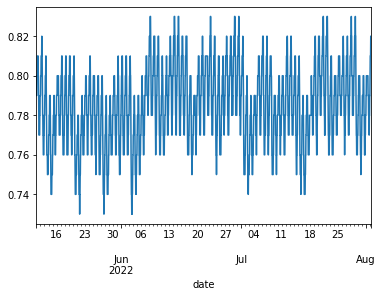

In [31]:
bed = df['occupied']
bed.plot()

In [41]:
def df_to_X_y(df, window_size=30):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [42]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(bed, WINDOW_SIZE)
X1.shape, y1.shape

((1995, 5, 1), (1995,))

In [43]:
X_train1, y_train1 = X1[:1500], y1[:1500]
X_val1, y_val1 = X1[1500:1750], y1[1500:1750]
X_test1, y_test1 = X1[1750:], y1[1750:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((1500, 5, 1), (1500,), (250, 5, 1), (250,), (245, 5, 1), (245,))

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [45]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [46]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
36/47 [=====================>........] - ETA: 0s - loss: 0.4489 - root_mean_squared_error: 0.6700

47/47 [==============================] - 5s 90ms/step - loss: 0.4225 - root_mean_squared_error: 0.6500 - val_loss: 0.3063 - val_root_mean_squared_error: 0.5535
Epoch 2/10
35/47 [=====================>........] - ETA: 0s - loss: 0.2286 - root_mean_squared_error: 0.4781

47/47 [==============================] - 4s 89ms/step - loss: 0.2055 - root_mean_squared_error: 0.4534 - val_loss: 0.1176 - val_root_mean_squared_error: 0.3430
Epoch 3/10
39/47 [=======================>......] - ETA: 0s - loss: 0.0700 - root_mean_squared_error: 0.2645

47/47 [==============================] - 5s 108ms/step - loss: 0.0628 - root_mean_squared_error: 0.2507 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1486
Epoch 4/10
33/47 [====================>.........] - ETA: 0s - loss: 0.0102 - root_mean_squared_error: 0.1010

47/47 [==============================] - 3s 67ms/step - loss: 0.0077 - root_mean_squared_error: 0.0879 - val_loss: 9.4209e-04 - val_root_mean_squared_error: 0.0307
Epoch 5/10
35/47 [=====================>........] - ETA: 0s - loss: 3.7360e-04 - root_mean_squared_error: 0.0193

47/47 [==============================] - 4s 81ms/step - loss: 3.2346e-04 - root_mean_squared_error: 0.0180 - val_loss: 1.9701e-04 - val_root_mean_squared_error: 0.0140
Epoch 6/10
32/47 [===================>..........] - ETA: 0s - loss: 1.8209e-04 - root_mean_squared_error: 0.0135

47/47 [==============================] - 3s 68ms/step - loss: 1.8433e-04 - root_mean_squared_error: 0.0136 - val_loss: 1.9700e-04 - val_root_mean_squared_error: 0.0140
Epoch 7/10
47/47 [==============================] - 0s 4ms/step - loss: 1.8428e-04 - root_mean_squared_error: 0.0136 - val_loss: 1.9714e-04 - val_root_mean_squared_error: 0.0140
Epoch 8/10
35/47 [=====================>........] - ETA: 0s - loss: 1.8683e-04 - root_mean_squared_error: 0.0137

47/47 [==============================] - 4s 80ms/step - loss: 1.8415e-04 - root_mean_squared_error: 0.0136 - val_loss: 1.9692e-04 - val_root_mean_squared_error: 0.0140
Epoch 9/10
47/47 [==============================] - 0s 4ms/step - loss: 1.8418e-04 - root_mean_squared_error: 0.0136 - val_loss: 1.9693e-04 - val_root_mean_squared_error: 0.0140
Epoch 10/10
32/47 [===================>..........] - ETA: 0s - loss: 1.8500e-04 - root_mean_squared_error: 0.0136

47/47 [==============================] - 3s 70ms/step - loss: 1.8420e-04 - root_mean_squared_error: 0.0136 - val_loss: 1.9671e-04 - val_root_mean_squared_error: 0.0140


In [47]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [48]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,0.793314,0.80
1,0.795110,0.81
2,0.798038,0.81
3,0.799484,0.81
4,0.801164,0.81
...,...,...
1495,0.807909,0.80
1496,0.807150,0.79
1497,0.804733,0.78
1498,0.798699,0.78


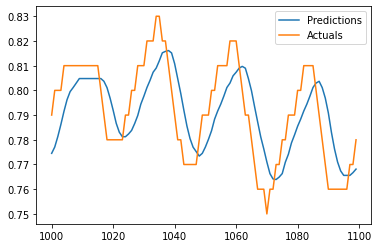

In [56]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1000:1100], label='Predictions')
plt.plot(train_results['Actuals'][1000:1100], label='Actuals')
plt.legend()

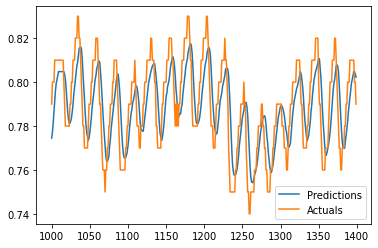

In [55]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1000:1400], label='Predictions')
plt.plot(train_results['Actuals'][1000:1400], label='Actuals')
plt.legend()

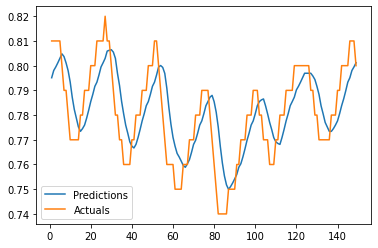

In [49]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1:150], label='Predictions')
plt.plot(train_results['Actuals'][1:150], label='Actuals')
plt.legend()

In [59]:
keras.metrics.mean_absolute_error(y_train1, train_predictions).numpy()

0.011571039

In [52]:
keras.metrics.mean_absolute_percentage_error(y_train1, train_predictions).numpy()

1.4806055

In [57]:
keras.metrics.mean_squared_error(y_train1, train_predictions).numpy()

0.0001841466